In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## NLP
import spacy
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import datetime as dt
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
import gensim
from gensim import corpora

spacy.load('en_core_web_sm')
from spacy.lang.en import English
parser = English()

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens


def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

en_stop = set(nltk.corpus.stopwords.words('english'))

def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 3]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

def word_Cloud_plot(tokenized_text,background):
    all_words = ' '.join([text for text in tokenized_text])
    wc = WordCloud(width=800,height = 500,random_state = 21,background_color=background, max_font_size = 100,max_words=50,
                    stopwords=STOPWORDS,contour_width=3, contour_color='steelblue')
    wc.generate(all_words)
    plt.figure(figsize = (10,7))
    plt.imshow(wc,interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

def word_Hist(tokenized_text):
    a = nltk.FreqDist(tokenized_text)
    d = pd.DataFrame({"Wordtag": list(a.keys()),"Count": list(a.values())})
    d = d.nlargest(columns = "Count", n = 10)
    plt.figure(figsize = (10,5))
    ax = sns.barplot(data = d, x = "Wordtag", y = 'Count')
    ax.set(ylabel = 'Count')
    plt.show()
    
def get_Topic(text_data,NUM_TOPICS,topic_words):
    dictionary = corpora.Dictionary(text_data)
    corpus = [dictionary.doc2bow(text) for text in text_data]
    
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
    topics = ldamodel.print_topics(num_words=topic_words)
    for topic in topics:
        print(topic)
def get_Sentiment(df,name):  
    sid = SentimentIntensityAnalyzer()
    df['sentiment_nltk'] = [sid.polarity_scores(i).get('compound') for i in df[name]]
    lst = []
    for i in range(len(df['sentiment_nltk'])):
        if df['sentiment_nltk'][i] >= 0:
            lst.append('Positive')
        elif df['sentiment_nltk'][i]< 0:
            lst.append('Negative')
  
    df['sentiment'] = lst
def pie_Percentage_Plot(df,title): 
    lst = list(df)

    dic = {}
    for key in lst:
        dic[key] = dic.get(key, 0) + 1
    labels = list(dic.keys())
    sizes = list(dic.values())
    

    
    fig = plt.figure(figsize = (16,12))
    ax1 = fig.add_subplot(2,2,1)


    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=False, startangle=90)
    ax1.axis('equal') 
    ax1.set_title(title, fontsize = 15)
    


    plt.show()

In [122]:
df = pd.read_csv('Post-NatCon 2021 Exhibitor Survey Data.csv',encoding='latin-1')

df.head()

,What were your strategic goals for attending SVAs 2021 National Conference? (check all that apply) - Selected Choice - Brand recognition,What were your strategic goals for attending SVAs 2021 National Conference? (check all that apply) - Selected Choice - Marketing research,What were your strategic goals for attending SVAs 2021 National Conference? (check all that apply) - Selected Choice - Networking,What were your strategic goals for attending SVAs 2021 National Conference? (check all that apply) - Selected Choice - Promoting a program or initiative,What were your strategic goals for attending SVAs 2021 National Conference? (check all that apply) - Selected Choice - Recruiting employees,What were your strategic goals for attending SVAs 2021 National Conference? (check all that apply) - Selected Choice - Research,What were your strategic goals for attending SVAs 2021 National Conference? (check all that apply) - Selected Choice - Other,What were your strategic goals for attending SVAs 2021 National Conference? (check all that apply) - Other - Text,What were your primary goal for attending SVAs 2021 National Conference? - Selected Choice,What were your primary goal for attending SVAs 2021 National Conference? - Other - Text,...,Please indicate the degree to which you agree or disagree with the following statements: - I was well informed by SVAs National Conference management via email on what to expect.,"Please indicate the degree to which you agree or disagree with the following statements: - If needed, I knew how to reach technical support.",Please indicate the degree to which you agree or disagree with the following statements: - SVAs National Conference staff was responsive to my needs.,Please indicate the degree to which you agree or disagree with the following statements: - The structure of the SVA National Conference gave me ample time to interact with attendees.,Please indicate the degree to which you agree or disagree with the following statements: - This event was a positive investment for my company / organization.,"Overall, which of the following best describes the traffic on the SVA Campus?","Overall, which of the following best describes the SVA National Conference Campus's exhibit hall hours?",What could SVA have done to make this a stronger investment for your company or organization?,How likely are you to attend the SVA's National Conference in 2022?,Please provide any other comments or suggestions that may help us improve the SVA Campus.
0,Brand recognition,NaN,Networking,Promoting a program or initiative,NaN,NaN,NaN,NaN,Promoting a program or initiative,NaN,...,Neutral,Strongly Agree,Strongly Agree,Agree,Agree,Extremely slow for my needs,Extremely short amount of time for my needs,NaN,Extremely Likely,NaN
1,Brand recognition,NaN,Networking,NaN,NaN,NaN,NaN,NaN,Brand recognition,NaN,...,Agree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Just right for my needs,Just right for my needs,More time and a single point of contact would ...,NaN,None.
2,Brand recognition,NaN,Networking,NaN,NaN,Research,NaN,NaN,Research,NaN,...,Agree,Strongly Agree,Strongly Agree,Disagree,Agree,Somewhat slow for my needs,Somewhat short amount of time for my needs,I think it was harder for people to engage the...,Likely,I thought the virtual setup was very well done...
3,Brand recognition,NaN,Networking,Promoting a program or initiative,NaN,NaN,NaN,NaN,Brand recognition,NaN,...,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Neutral,Just right for my needs,Just right for my needs,Increased promotion of organizations prior to ...,Extremely Likely,NaN
4,Brand recognition,NaN,Networking,Promoting a program or initiative,Recruiting employees,NaN,NaN,NaN,Promoting a program or initiative,NaN,...,Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Just right for my needs,Somewhat short amount of time for my needs,NaN,Extremely Likely,NaN


In [179]:
df.columns[2]

"Overall, which of the following best describes the SVA National Conference Campus's exhibit hall hours?"

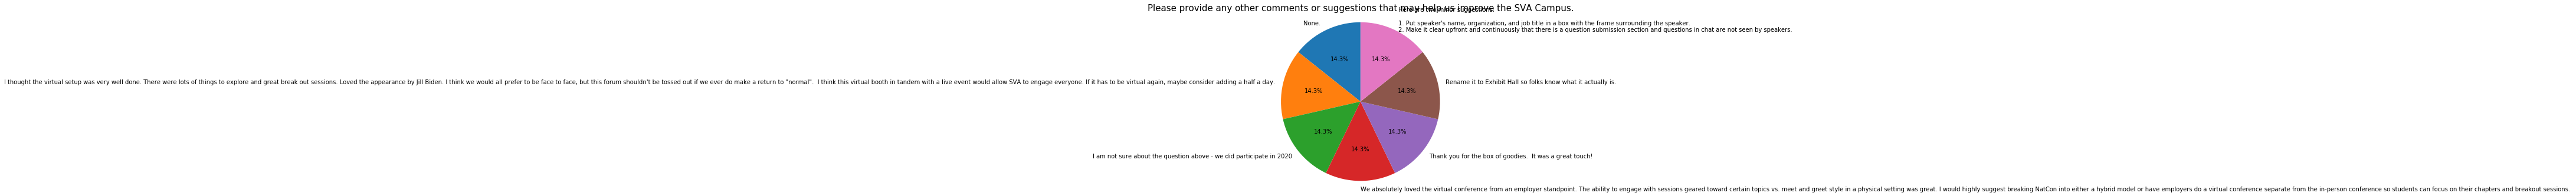

In [183]:
df_ = df[df.columns[29]].dropna().reset_index()[df.columns[29]]

pie_Percentage_Plot(df_,df.columns[29])

#pie_Percentage_Plot(df_,'This event was a positive investment for my company / organization.')

In [5]:
len(df)

21

In [118]:
df_ = df[df.columns[29]].dropna().reset_index()[df.columns[29
                                                          ]]
list(set(df_))

['None. ',
 'We absolutely loved the virtual conference from an employer standpoint. The ability to engage with sessions geared toward certain topics vs. meet and greet style in a physical setting was great. I would highly suggest breaking NatCon into either a hybrid model or have employers do a virtual conference separate from the in-person conference so students can focus on their chapters and breakout sessions. ',
 'Thank you for the box of goodies.  It was a great touch!',
 "Here are two minor suggestions:\n\n1. Put speaker's name, organization, and job title in a box with the frame surrounding the speaker.\n2. Make it clear upfront and continuously that there is a question submission section and questions in chat are not seen by speakers.\n",
 'I thought the virtual setup was very well done. There were lots of things to explore and great break out sessions. Loved the appearance by Jill Biden. I think we would all prefer to be face to face, but this forum shouldn\'t be tossed out i

In [117]:
df_ = df[df.columns[28]].dropna().reset_index()[df.columns[28]]
dict_key =[ 
'Extremely Likely','Likely ', 'Unlikely ','Unsure',  ]

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df 

,Frequency,Percentage
Extremely Likely,8,57.14%
Likely,4,28.57%
Unlikely,1,7.14%
Unsure,1,7.14%
Total,14,100.00%


In [110]:
df_ = df[df.columns[26]].dropna().reset_index()[df.columns[26]]
dict_key =[ 
'Somewhat long amount of time for my needs',
'Just right for my needs',
'Somewhat short amount of time for my needs',
'Extremely short amount of time for my needs',
'Somewhat long amount of time for my needs']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df 

,Frequency,Percentage
Somewhat long amount of time for my needs,2,11.76%
Just right for my needs,5,29.41%
Somewhat short amount of time for my needs,6,35.29%
Extremely short amount of time for my needs,4,23.53%
Total,17,100.00%


In [105]:
df_ = df[df.columns[25]].dropna().reset_index()[df.columns[25]]
dict_key =[ 
     'Just right for my needs',
    'Somewhat slow for my needs',

 'Extremely slow for my needs']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df 

,Frequency,Percentage
Just right for my needs,5,31.25%
Somewhat slow for my needs,4,25.00%
Extremely slow for my needs,7,43.75%
Total,16,100.00%


In [102]:
df_ = df[df.columns[24]].dropna().reset_index()[df.columns[24]]
dict_key =[ 'Strongly Agree','Agree','Neutral ', 'Disagree', 'Strongly Disagree']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df 

,Frequency,Percentage
Strongly Agree,3,16.67%
Agree,8,44.44%
Neutral,2,11.11%
Disagree,3,16.67%
Strongly Disagree,2,11.11%
Total,18,100.00%


In [83]:
## Online Registration

df_ = df[df.columns[18]].dropna().reset_index()[df.columns[18]]
dict_key =[ 'Strongly Agree','Agree','Neutral ', 'Disagree', 'Strongly Disagree']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df 

,Frequency,Percentage
Strongly Agree,4,20.00%
Agree,8,40.00%
Neutral,4,20.00%
Disagree,3,15.00%
Strongly Disagree,1,5.00%
Total,20,100.00%


In [80]:
## Online Registration

df_ = df[df.columns[17]].dropna().reset_index()[df.columns[17]]
dict_key =['None, 0','Not Applicable', "Don't Know / Unsure"]

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df 

,Frequency,Percentage
"None, 0",11,61.11%
Not Applicable,6,33.33%
Don't Know / Unsure,1,5.56%
Total,18,100.00%


In [74]:
## Online Registration


dict_key = ['None',"1-9", "Not Applicable"]
dic_ = {'None':[18,0],"1-9":[3,0], "Not Applicable":[5,0]}
count = 26

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df  



,Frequency,Percentage
None,18,69.23%
1-9,3,11.54%
Not Applicable,5,19.23%
Total,26,100.00%


In [66]:
## Online Registration

df_ = df[df.columns[15]].dropna().reset_index()[df.columns[15]]
dict_key =['Yes', 'No','Not Applicable', "Don't Know / Unsure"]

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df 

,Frequency,Percentage
Yes,6,27.27%
No,8,36.36%
Not Applicable,4,18.18%
Don't Know / Unsure,4,18.18%
Total,22,100.00%


In [60]:
## Online Registration

df_ = df[df.columns[14]].dropna().reset_index()[df.columns[14]]
dict_key =['Extremely interested',
           'Very interested',
 'Moderately interested',
 'Slightly interested',
 'Not interested at all']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df 

,Frequency,Percentage
Extremely interested,3,18.75%
Very interested,4,25.00%
Moderately interested,5,31.25%
Slightly interested,2,12.50%
Not interested at all,2,12.50%
Total,16,100.00%


In [57]:
## Online Registration

df_ = df[df.columns[13]].dropna().reset_index()[df.columns[13]]
dict_key = ['Yes', 'No']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df 

,Frequency,Percentage
Yes,12,66.67%
No,6,33.33%
Total,18,100.00%


In [56]:
## Online Registration

df_ = df[df.columns[12]].dropna().reset_index()[df.columns[12]]
dict_key = [
'More','Same', 'Less', "Unsure / Don't Know", 
]

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df  

,Frequency,Percentage
Yes,12,66.67%
No,6,33.33%
Total,18,100.00%


In [46]:
## Online Registration

df_ = df[df.columns[10]].dropna().reset_index()[df.columns[10]]
dict_key = [
'Completely achieved goal',
'Goal nearly achieved',
'Moderate progress in achieving goal',
'Minor progress in achieving goal',
'No progress towards goal'

]

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df  

,Frequency,Percentage
Completely achieved goal,2,10.00%
Goal nearly achieved,2,10.00%
Moderate progress in achieving goal,3,15.00%
Minor progress in achieving goal,10,50.00%
No progress towards goal,3,15.00%
Total,20,100.00%


In [37]:
## Please rate your experience with the Online Conference Platform on the following items:

dict_key = ['career awareness',"No applied"]
dic_ = {'career awareness': [len(df_),0], "No applied": [21-len(df_),0]}
count = 21

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df  

,Frequency,Percentage
career awareness,1,4.76%
No applied,20,95.24%
Total,21,100.00%


In [18]:
dic_.keys

<function dict.keys>

#### Q2 Please rate your conference experience on the following items: 

In [7]:
## Please rate your experience with the Online Conference Platform on the following items:

df_ = df['Q3_1'].dropna().reset_index()['Q3_1']
dict_key = ['Excellent','Good','Average','Fair','Poor']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df  

,Frequency,Percentage
Excellent,29,44.62%
Good,19,29.23%
Average,10,15.38%
Fair,3,4.62%
Poor,4,6.15%
Total,65,100.00%


In [8]:
## Please rate your experience with the Breakout Sessions on the following items:

df_ = df['Q16_1'].dropna().reset_index()['Q16_1']
dict_key = ['Excellent','Good','Average','Fair','Poor']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df  

,Frequency,Percentage
Excellent,36,51.43%
Good,23,32.86%
Average,4,5.71%
Fair,4,5.71%
Poor,3,4.29%
Total,70,100.00%


In [ ]:
# Q4 What breakouts, topics, or speakers would you recommend for next year’s national conference?

## 研究怎么提取关键信息


In [9]:
## Q5 Was NatCon 2021 a learning experience for you and your chapter?

df_ = df['Q5'].dropna().reset_index()['Q5']
dict_key = ['Yes','No']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df 

,Frequency,Percentage
Yes,64,90.14%
No,7,9.86%
Total,71,100.00%


In [10]:
## Q8 While at NatCon 2021, did you connect with:

df_ = df['Q8_1'].dropna().reset_index()['Q8_1']
dict_key = ['Yes','No']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df 


,Frequency,Percentage
Yes,25,36.23%
No,44,63.77%
Total,69,100.00%


In [12]:
## Q9 What are your chapter priorities for 2022? (check all that apply)

df_ = df['Q9'].dropna().reset_index()['Q9']
dict_key = ['Chapter recruitment','Chapter engagement','Training new chapter leaders','Fundraising']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df 


,Frequency,Percentage
Chapter recruitment,23,23.23%
Chapter engagement,39,39.39%
Training new chapter leaders,20,20.20%
Fundraising,17,17.17%
Total,99,100.00%


In [13]:
#10 Please select the previous SVA NatCons you attended (check all that apply)?

df_ = df['Q10'].dropna().reset_index()['Q10']
dict_key = [
    
    '2008 (Chicago, IL)',
    '2009 (San Francisco, CA)',
    '2010 (Washington, DC)',
    '2011 (Las Vegas, NV)',
    '2013 (Orlando, FL)',
    '2014 (Scottsdale, AZ)',
    '2015 (San Antonio, TX)',
    '2016 (Orlando, FL)',
    '2017 (Anaheim, CA)',
    '2018 (San Antonio, TX)',
    '2019 (Orlando, FL)',
    '2020 (Los Angeles, CA)',
    'None of the above / 2021 (Virtual Conference) was my first NatCon'


]

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df 

,Frequency,Percentage
"2008 (Chicago, IL)",0,0.00%
"2009 (San Francisco, CA)",1,1.06%
"2010 (Washington, DC)",2,2.13%
"2011 (Las Vegas, NV)",0,0.00%
"2013 (Orlando, FL)",2,2.13%
"2014 (Scottsdale, AZ)",1,1.06%
"2015 (San Antonio, TX)",0,0.00%
"2016 (Orlando, FL)",3,3.19%
"2017 (Anaheim, CA)",4,4.26%
"2018 (San Antonio, TX)",8,8.51%


In [15]:
#Q11 How would you rate this year's national conference to previous national conferences that you attended?

df_ = df['Q11'].dropna().reset_index()['Q11']
dict_key = ['Extremely Better','Somewhat Better','Slightly Better','Same, No Difference','Slightly Worse','Somewhat Worse','Extremely Worse']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df  


,Frequency,Percentage
Extremely Better,11,31.43%
Somewhat Better,3,8.57%
Slightly Better,2,5.71%
"Same, No Difference",10,28.57%
Slightly Worse,5,14.29%
Somewhat Worse,2,5.71%
Extremely Worse,2,5.71%
Total,35,100.00%


In [3]:
##

df_ = df['Q13_1'].dropna().reset_index()['Q13_1']
dict_key = ['Extremely likely','Somewhat likely','Neither likely nor unlikely','Somewhat unlikely','Extremely unlikely']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df  


,Frequency,Percentage
Extremely likely,56,78.87%
Somewhat likely,12,16.90%
Neither likely nor unlikely,1,1.41%
Somewhat unlikely,1,1.41%
Extremely unlikely,1,1.41%
Total,71,100.00%


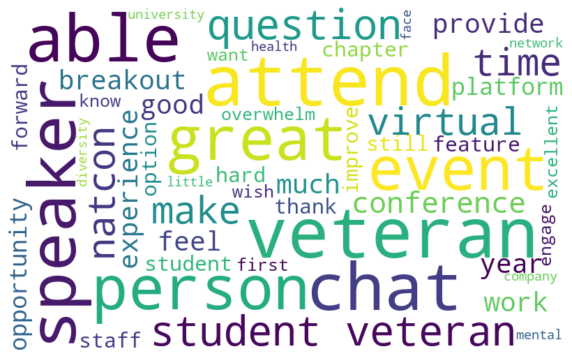

In [6]:


text_data = []
text = df['Q30'].dropna().reset_index()['Q30']

for i in range(len(text)):
    tokens = prepare_text_for_lda(text[i])
    text_data.append(tokens)
text_list = [j for sub in text_data for j in sub]
word_Cloud_plot(text_list,'white')

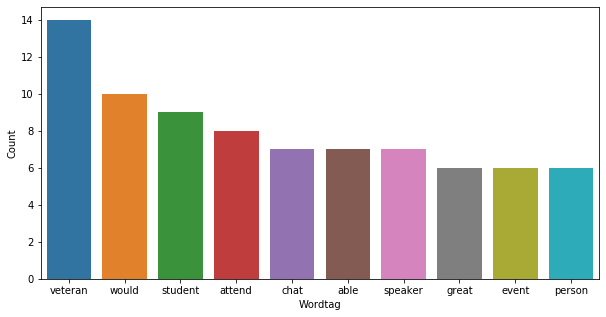

In [7]:
word_Hist(text_list)